<a href="https://colab.research.google.com/github/Gylla/Proyecto-Integrador/blob/master/Proyecto_Strava.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Identificación de patrones colectivos en datos públicos de Strava mediante análisis estadístico y dashboards interactivos
**Objetivo General**
Identificar patrones colectivos en un conjunto de datos públicos de Strava mediante técnicas de análisis estadístico y presentarlos en dashboards interactivos reproducibles.

## ⚙️ Configuración Inicial
Instalación de librerías y preparación del entorno de análisis.

In [7]:
# importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from matplotlib.gridspec import GridSpec

# configuración del entorno

## Carga del Dataset
Descarga e importación del conjunto de datos desde repositorio remoto.

In [12]:
!wget --quiet -O strava_data.csv https://raw.githubusercontent.com/Gylla/Proyecto-Integrador/refs/heads/master/Data/strava_data.csv
df = pd.read_csv('strava_data.csv')

## Exploración Inicial
Revisión general del tamaño del dataset, tipos de variables y primeros registros. Se debe reflejar la justificación del proyecto.

Tareas:

*   Explorar las diferentes columnas y conocer los elementos únicos.
*   Identificar datos categóricos.
*   Determinar que columnas se relacionan entre sí.




In [ ]:
df.head()

,start_date_local,type,name,distance,moving_time,total_elevation_gain,average_speed,max_speed,average_heartrate,max_heartrate
0,2022-11-18T08:38:29Z,Walk,Morning Walk,3563.3,2122,99.0,1.679,5.622,100.8,130.0
1,2022-11-17T16:06:02Z,Ride,Evening Ride,30646.5,5742,130.0,5.337,12.612,121.1,166.0
2,2022-11-15T17:42:54Z,Ride,Evening Ride,34271.7,5653,118.0,6.063,10.222,121.5,167.0
3,2022-11-12T08:05:43Z,Ride,Morning Ride,181300.0,28762,808.0,6.303,14.963,149.3,179.0
4,2022-11-10T20:22:58Z,Walk,Evening Walk,4251.3,3305,70.0,1.286,2.009,88.0,141.0


In [ ]:
df.shape

(544, 10)

## Fases CRISP-DM
CRISP-DM (Cross-Industry Standard Process for Data Mining) es una metodología estructurada en seis fases para organizar proyectos de análisis de datos de forma sistemática y reproducible: Que aplicaremos para guiar de forma ordenada el análisis de nuestras 544 actividades de Strava, cubriendo desde la definición de objetivos y preguntas clave, la exploración y limpieza de datos (unidades, nulos, outliers), el modelado estadístico y visualizaciones, hasta la validación de resultados y el despliegue de dashboards interactivos reproducibles con Python y Power BI.

## 1. Comprensión del Negocio

- **Contexto:** 544 actividades Strava anónimas (11 modalidades), sin visión agregada.  
- **Objetivo:** Identificar patrones colectivos de velocidad, distancia y FC.  
- **Stakeholders:** Investigadores, entrenadores y equipos de producto.  
- **Preguntas clave:**  
  - ¿Velocidad media por modalidad?  
  - ¿Rangos de FC más frecuentes?  
  - ¿Patrones temporales?  
- **Éxito:** Dashboard interactivo y análisis reproducible.

## 2. Comprensión de los Datos
Estructura del dataset, tipos de variables, valores nulos, outliers.

In [ ]:
# Análisis de valores únicos por columna
print("\n" + "="*60)
print("ANÁLISIS DE VALORES ÚNICOS POR COLUMNA".center(60))
print("="*60 + "\n")

for i, columna in enumerate(df.columns, 1):
    # Obtener valores únicos
    valores_unicos = df[columna].unique()
    num_unicos = len(valores_unicos)

    # Mostrar información de la columna
    print(f"\nCOLUMNA {i}: {columna}".ljust(50) + f"({num_unicos} valores únicos)")
    print("-"*60)

    # Mostrar valores únicos (con formato para listas largas)
    if num_unicos <= 10:
        print(valores_unicos)
    else:
        print(f"Primeros 5 valores: {valores_unicos[:5]}")
        print(f"Últimos 5 valores: {valores_unicos[-5:]}")
        print(f"\nMuestra de valores intermedios: {valores_unicos[5:10]}" if num_unicos > 10 else "")

    # Estadísticas adicionales
    print(f"\nTipo de dato: {df[columna].dtype}")
    if pd.api.types.is_numeric_dtype(df[columna]):
        print(f"Rango: {df[columna].min()} - {df[columna].max()}")

    print("="*60)

print("\n" + "ANÁLISIS COMPLETADO".center(60, "~") + "\n")


           ANÁLISIS DE VALORES ÚNICOS POR COLUMNA           


COLUMNA 1: start_date_local                      (471 valores únicos)
------------------------------------------------------------
Primeros 5 valores: ['2022-11-18T08:38:29Z' '2022-11-17T16:06:02Z' '2022-11-15T17:42:54Z'
 '2022-11-12T08:05:43Z' '2022-11-10T20:22:58Z']
Últimos 5 valores: ['2020-08-22T17:11:57Z' '2020-08-16T09:24:57Z' '2020-08-08T11:33:49Z'
 '2020-08-06T19:09:25Z' '2020-04-13T11:42:10Z']

Muestra de valores intermedios: ['2022-11-09T16:24:20Z' '2022-11-08T16:51:57Z' '2022-11-07T14:28:39Z'
 '2022-11-06T13:04:33Z' '2022-11-05T10:43:44Z']

Tipo de dato: object

COLUMNA 2: type                                  (12 valores únicos)
------------------------------------------------------------
Primeros 5 valores: ['Walk' 'Ride' 'Hike' 'Run' 'Swim']
Últimos 5 valores: ['StandUpPaddling' 'EBikeRide' 'Snowboard' 'WeightTraining' 'Workout']

Muestra de valores intermedios: ['Surfing' 'Kayaking' 'StandUpPaddling' 'EBikeR

In [ ]:
df.max_speed.unique()

array([ 5.622, 12.612, 10.222, 14.963,  2.009, 13.664, 11.898, 14.294,
       12.335,  6.625, 10.722,  3.215,  3.376, 12.326,  5.205, 13.25 ,
        4.803, 11.458, 10.87 , 17.746,  3.154,  6.004,  2.846,  3.744,
       13.158,  5.405, 17.25 ,  0.635,  2.488, 13.552,  8.936, 16.623,
       10.09 ,  9.809,  2.864,  3.318,  2.563, 15.741, 14.884,  2.926,
        2.98 ,  6.223,  3.922,  4.538, 14.388, 13.174,  2.622,  2.52 ,
       14.706, 13.402,  4.251,  4.17 ,  9.667,  2.586,  4.572, 12.333,
       18.076,  2.423, 13.906, 16.602,  4.998, 14.146, 10.508, 11.082,
       10.142, 11.638,  3.934, 15.114,  8.62 ,  3.661, 13.308, 13.788,
        2.388,  2.63 , 12.708, 10.717,  9.331,  8.294,  3.996, 12.302,
        3.423,  2.202,  4.19 ,  3.7  ,  3.724,  3.14 , 13.181, 10.933,
       10.367, 13.002, 11.01 , 13.524,  3.737,  3.165,  4.315, 12.187,
       14.66 , 16.268, 13.962,  2.581, 11.918,  3.242, 13.132, 16.458,
        2.62 ,  1.8  , 18.96 ,  2.123, 13.628, 16.408, 14.013, 14.655,
      

# Limpieza

verificar datos porcentaje de datos faltantes

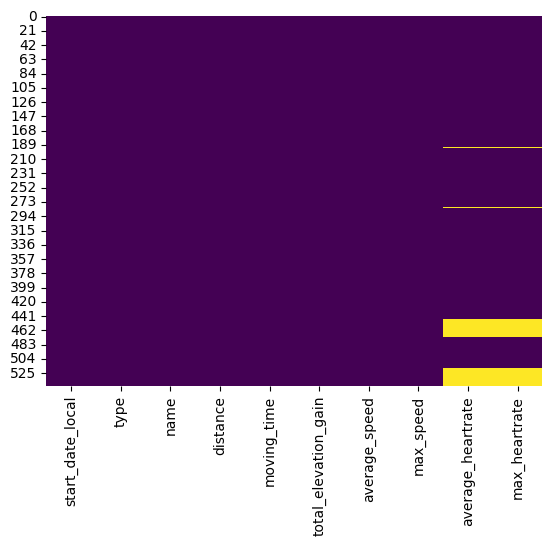

In [ ]:
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.show()

In [ ]:
# Crear una lista de tuplas con los resultados
results = []
for col in df.columns:
    pct_missing = np.mean(df[col].isnull()) * 100
    results.append((col, round(pct_missing, 2)))

# Convertir a DataFrame para mejor formato
results_df = pd.DataFrame(results, columns=['Columna', '% Faltante'])

# Imprimir como tabla Markdown
print(results_df.to_markdown(index=False, tablefmt="github", stralign="left", numalign="right"))

| Columna              |   % Faltante |
|----------------------|--------------|
| start_date_local     |            0 |
| type                 |            0 |
| name                 |            0 |
| distance             |            0 |
| moving_time          |            0 |
| total_elevation_gain |            0 |
| average_speed        |            0 |
| max_speed            |            0 |
| average_heartrate    |        10.11 |
| max_heartrate        |        10.11 |


## Código para Identificar y Mostrar Datos Nulos

In [ ]:
# Filtrar filas con valores nulos en las columnas de frecuencia cardíaca
null_heartrate = df[df['average_heartrate'].isna() | df['max_heartrate'].isna()]

# Mostrar tabla con Markdown
if not null_heartrate.empty:
    display(Markdown("### Registros con valores nulos en frecuencia cardíaca"))
    display(Markdown(null_heartrate.to_markdown()))
else:
    display(Markdown("No hay valores nulos en las columnas de frecuencia cardíaca."))

# Estadísticas de nulos
display(Markdown(f"**Total de registros nulos:** {null_heartrate.shape[0]}"))
display(Markdown(f"**Porcentaje de nulos:** {null_heartrate.shape[0]/df.shape[0]*100:.2f}%"))

## 1. Análisis por Tipo de Actividad
      
  Identificar si los valores nulos están concentrados en ciertos tipos de actividades donde quizás no se registra frecuencia cardíaca (como WeightTraining o Swimming)

  Determinar si hay patrones por actividad que justifiquen mantener los nulos o imputarlos

In [ ]:
def analizar_nulos_frecuencia_cardiaca(df):
    """Función optimizada para analizar nulos en ambas variables cardíacas"""

    # Configuración inicial
    pd.set_option('display.max_rows', None)
    vars_cardiacas = ['average_heartrate', 'max_heartrate']

    # Análisis combinado para ambas variables
    df['cardiac_nulls'] = df[vars_cardiacas].isnull().any(axis=1)

    # Conteo por tipo de actividad
    null_by_type = df['type'][df['cardiac_nulls']].value_counts()
    total_by_type = df['type'].value_counts()

    # DataFrame de resultados
    result_df = pd.DataFrame({
        'Total Actividades': total_by_type,
        'Registros con Nulos': null_by_type.reindex(total_by_type.index, fill_value=0),
        '% Nulos': (null_by_type.reindex(total_by_type.index, fill_value=0) / total_by_type * 100).round(2)
    }).sort_values('% Nulos', ascending=False)

    # Análisis individual por variable
    individual_stats = {}
    for var in vars_cardiacas:
        individual_stats[var] = {
            'total_nulos': df[var].isna().sum(),
            'porcentaje_nulos': (df[var].isna().mean() * 100).round(2)
        }

    # Visualización
    display(Markdown("## Análisis Combinado de Valores Nulos en Métricas Cardíacas"))
    display(Markdown("### Distribución por Tipo de Actividad (average_heartrate OR max_heartrate)"))
    display(Markdown(result_df.to_markdown()))

    display(Markdown("\n### Estadísticas Individuales por Variable"))
    stats_df = pd.DataFrame(individual_stats).T
    display(Markdown(stats_df.to_markdown()))

    display(Markdown("\n**Resumen Estadístico:**"))
    display(Markdown(f"- Actividades con datos completos (0% nulos): {(result_df['% Nulos'] == 0).sum()}"))
    display(Markdown(f"- Actividad con mayor % de nulos: {result_df.index[0]} ({result_df.iloc[0, 2]}%)"))
    display(Markdown(f"- Total registros analizados: {len(df)}"))
    display(Markdown(f"- Registros con al menos un valor nulo: {df['cardiac_nulls'].sum()}"))

    return result_df

# Ejecutar la función
resultados = analizar_nulos_frecuencia_cardiaca(df)

## Análisis Combinado de Valores Nulos en Métricas Cardíacas

### Distribución por Tipo de Actividad (average_heartrate OR max_heartrate)

| type            |   Total Actividades |   Registros con Nulos |   % Nulos |
|:----------------|--------------------:|----------------------:|----------:|
| EBikeRide       |                   3 |                     2 |     66.67 |
| Ride            |                 297 |                    52 |     17.51 |
| Walk            |                 116 |                     1 |      0.86 |
| Hike            |                  67 |                     0 |      0    |
| Run             |                  31 |                     0 |      0    |
| Snowboard       |                   8 |                     0 |      0    |
| Workout         |                   6 |                     0 |      0    |
| WeightTraining  |                   6 |                     0 |      0    |
| Kayaking        |                   5 |                     0 |      0    |
| Swim            |                   2 |                     0 |      0    |
| Surfing         |                   2 |                     0 |      0    |
| StandUpPaddling |                   1 |                     0 |      0    |


### Estadísticas Individuales por Variable

|                   |   total_nulos |   porcentaje_nulos |
|:------------------|--------------:|-------------------:|
| average_heartrate |            55 |              10.11 |
| max_heartrate     |            55 |              10.11 |


**Resumen Estadístico:**

- Actividades con datos completos (0% nulos): 9

- Actividad con mayor % de nulos: EBikeRide (66.67%)

- Total registros analizados: 544

- Registros con al menos un valor nulo: 55

## Visualización del Análisis de Valores Nulos
  A continuación presento un segmento de visualización completo que complementa el análisis previo, mostrando los patrones de valores nulos de manera gráfica:

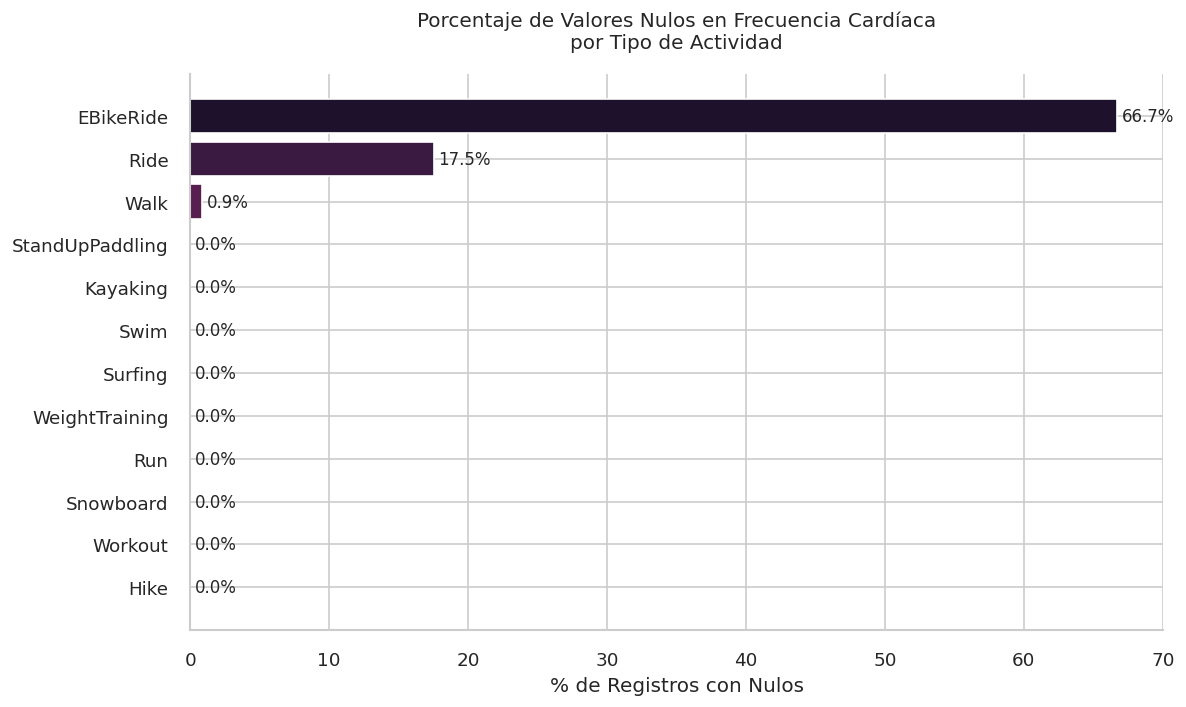

In [ ]:
plt.figure(figsize=(10, 6))
null_analysis = resultados.sort_values('% Nulos', ascending=True)
bars = plt.barh(null_analysis.index, null_analysis['% Nulos'],
               color=sns.color_palette("rocket_r", len(null_analysis)))

plt.title('Porcentaje de Valores Nulos en Frecuencia Cardíaca\npor Tipo de Actividad', pad=15)
plt.xlabel('% de Registros con Nulos')
plt.gca().bar_label(bars, fmt='%.1f%%', padding=3)
sns.despine()
plt.tight_layout()
plt.show()

## Estrategia Óptima para Tratar Valores Nulos
  Basado en el análisis realizado, recomiendo una estrategia diferenciada por tipo de actividad:
  1. Para EBikeRide (66.67% nulos)
Acción: Eliminar estas observaciones del análisis cardíaco

 Razón:
 - Demasiados valores faltantes (2 de 3 registros)
 - Posiblemente no se mide FC en esta actividad
 - No es confiable hacer imputación con tan pocos datos

2. Para Ride (17.51% nulos)
Acción: Imputación avanzada por grupos
3. Para Walk (0.86% nulos)
Acción: Imputación simple
4. Para actividades con 0% nulos
Acción: No requiere tratamiento
 Razón: Datos completos y confiables

## Proceso Recomendado Paso a Paso:
1. Primero eliminar
2. Luego imputar
3. Verificar resultados

##Consideraciones Adicionales:
1. Para max_heartrate:
Aplicar la misma estrategia que para average_heartrate
 Considerar imputar basado en relación con average_heartrate cuando sea posible
2. Validación:
Comparar estadísticas descriptivas antes/después de imputación
Verificar que la distribución no se haya distorsionado


In [ ]:
def create_clean_dataframe(df_original):
    """
    Crea un DataFrame limpio sin modificar el original
    """
    # Crear copia profunda independiente
    df_clean = df_original.copy(deep=True)

    ## 1. Eliminar EBikeRide (alta tasa de nulos)
    df_clean = df_clean[df_clean['type'] != 'EBikeRide'].copy()

    ## 2. Definir función de imputación segura
    def safe_impute(df, activity_type, target_col):
        # Filtrar por tipo de actividad
        activity_data = df[df['type'] == activity_type].copy()

        # Crear grupos de intensidad solo si hay datos
        if not activity_data.empty:
            activity_data['intensity_group'] = pd.qcut(
                activity_data['average_speed'],
                q=4,
                labels=['baja', 'media', 'alta', 'muy alta'],
                duplicates='drop'
            )

            # Calcular medianas por grupo de forma segura
            group_medians = activity_data.groupby('intensity_group', observed=True)[target_col].median()

            # Imputar valores
            for group_name, group_value in group_medians.items():
                mask = (df['type'] == activity_type) & \
                       (df[target_col].isna()) & \
                       (df['intensity_group'] == group_name)
                df.loc[mask, target_col] = group_value

        return df

    ## 3. Proceso de limpieza paso a paso

    # Primero crear grupos de intensidad para todas las actividades relevantes
    ride_mask = df_clean['type'] == 'Ride'
    df_clean.loc[ride_mask, 'intensity_group'] = pd.qcut(
        df_clean[ride_mask]['average_speed'],
        q=4,
        labels=['baja', 'media', 'alta', 'muy alta'],
        duplicates='drop'
    )

    # Imputar average_heartrate
    df_clean = safe_impute(df_clean, 'Ride', 'average_heartrate')

    # Imputación simple para Walk (no necesita grupos)
    walk_median = df_clean[df_clean['type'] == 'Walk']['average_heartrate'].median()
    walk_nulls = (df_clean['type'] == 'Walk') & df_clean['average_heartrate'].isna()
    df_clean.loc[walk_nulls, 'average_heartrate'] = walk_median

    # Imputar max_heartrate basado en average_heartrate
    # Primero imputamos como hicimos con average_heartrate
    df_clean = safe_impute(df_clean, 'Ride', 'max_heartrate')

    # Para Walk
    walk_max_median = df_clean[df_clean['type'] == 'Walk']['max_heartrate'].median()
    df_clean.loc[walk_nulls, 'max_heartrate'] = walk_max_median

    # Luego para registros donde max_heartrate es nulo pero average_heartrate existe
    valid_pairs = df_clean[['average_heartrate', 'max_heartrate']].dropna()
    if not valid_pairs.empty:
        ratio = (valid_pairs['max_heartrate'] / valid_pairs['average_heartrate']).median()
        max_null_mask = df_clean['max_heartrate'].isna() & df_clean['average_heartrate'].notna()
        df_clean.loc[max_null_mask, 'max_heartrate'] = df_clean.loc[max_null_mask, 'average_heartrate'] * ratio

    # Eliminar columna temporal
    df_clean.drop('intensity_group', axis=1, inplace=True, errors='ignore')

    return df_clean

# Uso del método
df_clean = create_clean_dataframe(df)

# Verificación
print("\nResumen de limpieza:")
print(f"Registros originales: {len(df)}")
print(f"Registros limpios: {len(df_clean)}")
print(f"Nulos en average_heartrate: {df_clean['average_heartrate'].isna().sum()}")
print(f"Nulos en max_heartrate: {df_clean['max_heartrate'].isna().sum()}")


Resumen de limpieza:
Registros originales: 544
Registros limpios: 541
Nulos en average_heartrate: 0
Nulos en max_heartrate: 0


## Análisis Post-Limpieza con Visualización Comparativa
Objetivo: analizar y comparar los resultados antes y después de la limpieza:

In [ ]:
def analizar_comparativo(df_original, df_clean):
    """
    Realiza análisis comparativo entre el DataFrame original y el limpio
    """
    # Configuración de visualización
    pd.set_option('display.max_rows', None)

    # Función modificada para análisis individual
    def analizar_nulos(df, label):
        vars_cardiacas = ['average_heartrate', 'max_heartrate']
        df['cardiac_nulls'] = df[vars_cardiacas].isnull().any(axis=1)

        null_by_type = df['type'][df['cardiac_nulls']].value_counts()
        total_by_type = df['type'].value_counts()

        result_df = pd.DataFrame({
            'Total': total_by_type,
            'Con Nulos': null_by_type.reindex(total_by_type.index, fill_value=0),
            '% Nulos': (null_by_type.reindex(total_by_type.index, fill_value=0) / total_by_type * 100).round(2)
        }).sort_values('% Nulos', ascending=False)

        individual_stats = {}
        for var in vars_cardiacas:
            individual_stats[var] = {
                'Total Nulos': df[var].isna().sum(),
                '% Nulos': (df[var].isna().mean() * 100).round(2)
            }

        display(Markdown(f"### {label}"))
        display(Markdown("#### Distribución por Tipo de Actividad"))
        display(Markdown(result_df.to_markdown()))

        display(Markdown("\n#### Estadísticas por Variable"))
        display(Markdown(pd.DataFrame(individual_stats).T.to_markdown()))

        return result_df

    # Análisis original
    display(Markdown("# ANÁLISIS COMPARATIVO: ANTES Y DESPUÉS DE LA LIMPIEZA"))
    display(Markdown("## Datos Originales"))
    orig_results = analizar_nulos(df_original, "Estado Original")

    # Análisis limpio
    display(Markdown("\n## Datos Limpios"))
    clean_results = analizar_nulos(df_clean, "Post-Limpieza")

    # Análisis comparativo
    display(Markdown("\n## Resumen Comparativo"))
    comparison = pd.DataFrame({
        'Original (% Nulos)': orig_results['% Nulos'],
        'Limpio (% Nulos)': clean_results['% Nulos'].reindex(orig_results.index, fill_value=0),
        'Reducción': (orig_results['% Nulos'] - clean_results['% Nulos'].reindex(orig_results.index, fill_value=0)).round(2)
    })
    display(Markdown(comparison.to_markdown()))

    # Estadísticas globales
    display(Markdown("\n### Estadísticas Globales"))
    global_stats = pd.DataFrame({
        'Metrica': ['Total registros', 'Registros con nulos', '% Nulos promedio'],
        'Original': [
            len(df_original),
            df_original[['average_heartrate', 'max_heartrate']].isnull().any(axis=1).sum(),
            (df_original[['average_heartrate', 'max_heartrate']].isnull().any(axis=1).mean() * 100).round(2)
        ],
        'Limpio': [
            len(df_clean),
            df_clean[['average_heartrate', 'max_heartrate']].isnull().any(axis=1).sum(),
            (df_clean[['average_heartrate', 'max_heartrate']].isnull().any(axis=1).mean() * 100).round(2)
        ]
    })
    display(Markdown(global_stats.to_markdown(floatfmt=".2f")))

# Ejecutar el análisis comparativo
analizar_comparativo(df, df_clean)

# ANÁLISIS COMPARATIVO: ANTES Y DESPUÉS DE LA LIMPIEZA

## Datos Originales

### Estado Original

#### Distribución por Tipo de Actividad

| type            |   Total |   Con Nulos |   % Nulos |
|:----------------|--------:|------------:|----------:|
| EBikeRide       |       3 |           2 |     66.67 |
| Ride            |     297 |          52 |     17.51 |
| Walk            |     116 |           1 |      0.86 |
| Hike            |      67 |           0 |      0    |
| Run             |      31 |           0 |      0    |
| Snowboard       |       8 |           0 |      0    |
| Workout         |       6 |           0 |      0    |
| WeightTraining  |       6 |           0 |      0    |
| Kayaking        |       5 |           0 |      0    |
| Swim            |       2 |           0 |      0    |
| Surfing         |       2 |           0 |      0    |
| StandUpPaddling |       1 |           0 |      0    |


#### Estadísticas por Variable

|                   |   Total Nulos |   % Nulos |
|:------------------|--------------:|----------:|
| average_heartrate |            55 |     10.11 |
| max_heartrate     |            55 |     10.11 |


## Datos Limpios

### Post-Limpieza

#### Distribución por Tipo de Actividad

| type            |   Total |   Con Nulos |   % Nulos |
|:----------------|--------:|------------:|----------:|
| Ride            |     297 |           0 |         0 |
| Walk            |     116 |           0 |         0 |
| Hike            |      67 |           0 |         0 |
| Run             |      31 |           0 |         0 |
| Snowboard       |       8 |           0 |         0 |
| WeightTraining  |       6 |           0 |         0 |
| Workout         |       6 |           0 |         0 |
| Kayaking        |       5 |           0 |         0 |
| Swim            |       2 |           0 |         0 |
| Surfing         |       2 |           0 |         0 |
| StandUpPaddling |       1 |           0 |         0 |


#### Estadísticas por Variable

|                   |   Total Nulos |   % Nulos |
|:------------------|--------------:|----------:|
| average_heartrate |             0 |         0 |
| max_heartrate     |             0 |         0 |


## Resumen Comparativo

| type            |   Original (% Nulos) |   Limpio (% Nulos) |   Reducción |
|:----------------|---------------------:|-------------------:|------------:|
| EBikeRide       |                66.67 |                  0 |       66.67 |
| Ride            |                17.51 |                  0 |       17.51 |
| Walk            |                 0.86 |                  0 |        0.86 |
| Hike            |                 0    |                  0 |        0    |
| Run             |                 0    |                  0 |        0    |
| Snowboard       |                 0    |                  0 |        0    |
| Workout         |                 0    |                  0 |        0    |
| WeightTraining  |                 0    |                  0 |        0    |
| Kayaking        |                 0    |                  0 |        0    |
| Swim            |                 0    |                  0 |        0    |
| Surfing         |                 0    |                  0 |        0    |
| StandUpPaddling |                 0    |                  0 |        0    |


### Estadísticas Globales

|    | Metrica             |   Original |   Limpio |
|---:|:--------------------|-----------:|---------:|
|  0 | Total registros     |     544.00 |   541.00 |
|  1 | Registros con nulos |      55.00 |     0.00 |
|  2 | % Nulos promedio    |      10.11 |     0.00 |